### 1.3

（1）标准正态分布

In [1]:
#构造(Un)^n，从标准正态总体中抽取1000个样本
set.seed(0)
x <- rnorm(1000,0,1)
x1 <- sort(x)
F <- pnorm(x1)
U <- rep(0,1000)
for(i in 1:999){U[100] <- F[1000]
    U[i] <- F[i]/F[i+1]
}
head(U)

[1] 0.5894597 0.5590085 0.9096818 0.6110473 0.3364947 0.8659897

In [2]:
Ui <- rep(0,1000)
for(i in 1:1000){
    Ui[i] <- (U[i])^i
}
head(Ui)

[1] 0.589459658 0.312490468 0.752780695 0.139411737 0.004314108 0.421770750

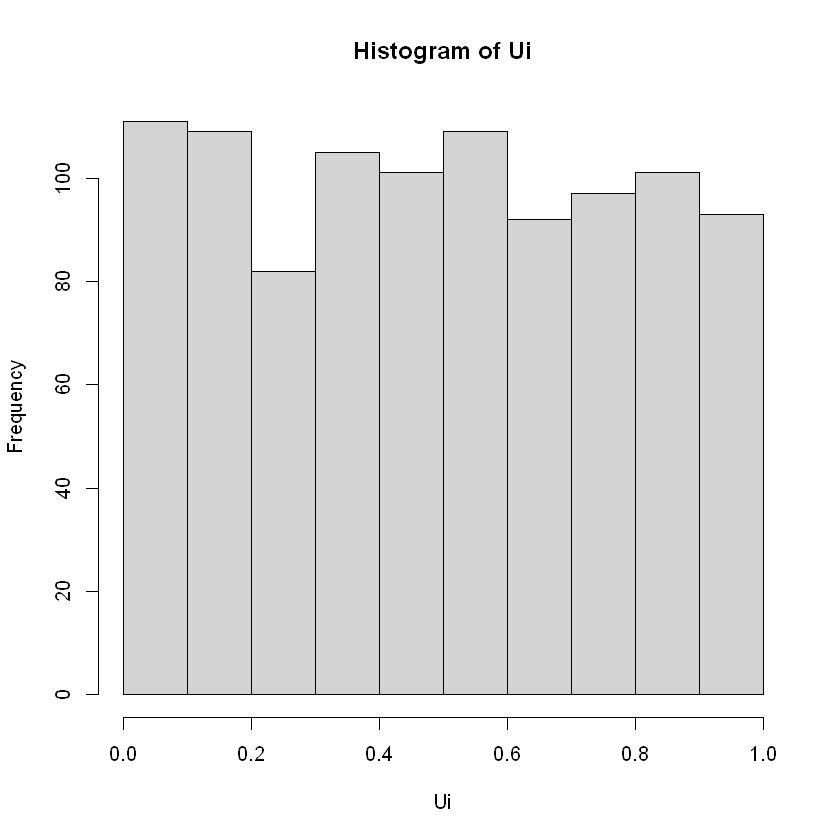

In [3]:
#证明(Un)^n为来自(0,1)上均匀分布的iid样本
##做直方图
hist(Ui)

In [4]:
##做ks检验
ks.test(Ui,punif)


	One-sample Kolmogorov-Smirnov test

data:  Ui
D = 0.026571, p-value = 0.4802
alternative hypothesis: two-sided


（2）指数分布

In [5]:
set.seed(0)
x<-rexp(10000,1)
head(x)
x1=sort(x)
F=pexp(x1)
U=seq(1,10000,by=1)
for (i in 1:9999){
  U[i]=(F[i]/F[i+1])^i
}
y=runif(9999,min=0,max=1)
ks.test(U,y)

[1] 0.1840366 0.1457067 0.1397953 0.4360686 2.8949685 1.2295621


	Two-sample Kolmogorov-Smirnov test

data:  U and y
D = 0.0077893, p-value = 0.922
alternative hypothesis: two-sided


In [7]:
U=seq(1,10000,by=1)
for (i in 1:9999){
  U[i]=(y[i]/y[i+1])^i
}
head(U)

[1] 0.000000e+00 3.588419e-15 2.127864e-13 1.034111e-12 2.407996e-12
[6] 4.082530e-12

（3）卡方分布

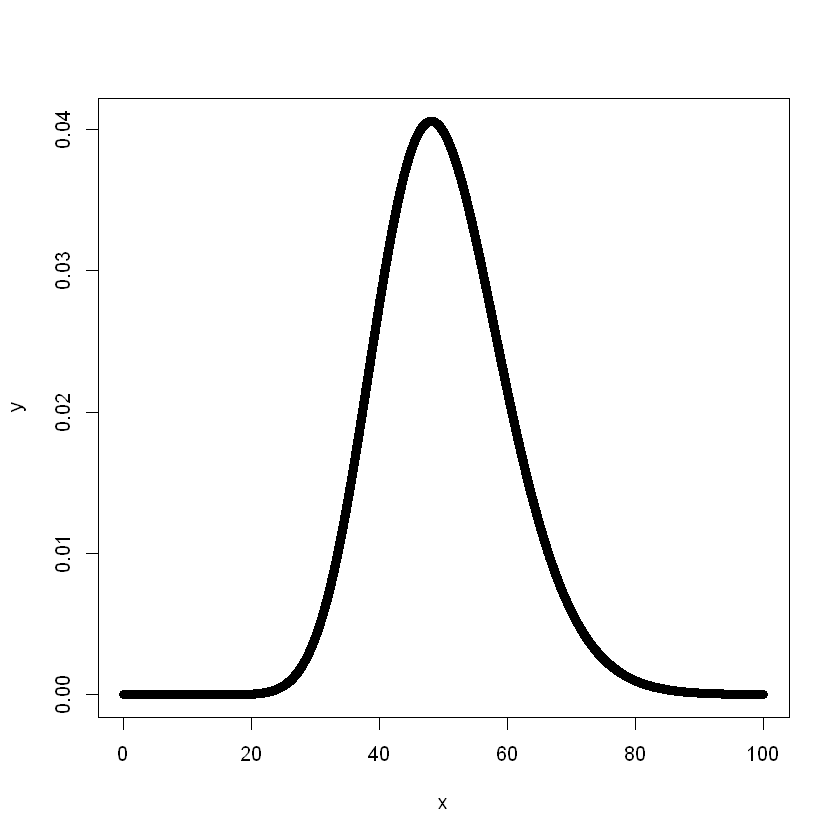

In [6]:
set.seed(1)
x <- seq(0,100,0.01)
y <- dchisq(x,50)       ##生成概率密度函数      
plot(x,y)                ##绘制概率密度函数

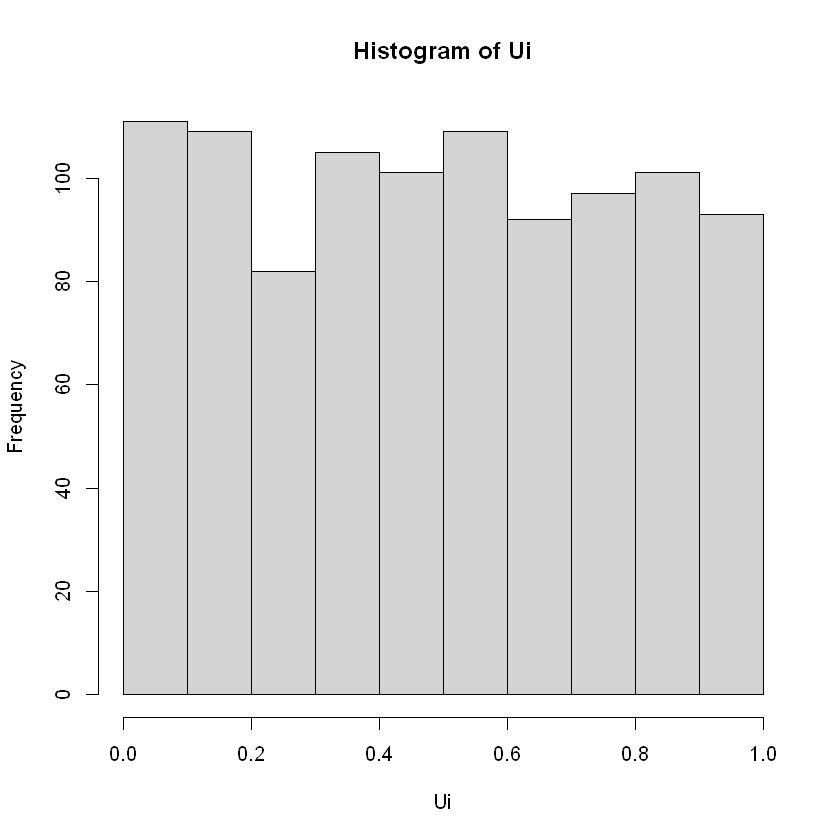

In [9]:
##做直方图
hist(Ui)

### 1.4

![图片](D:\nonparametric\各章数据\第1章\屏幕截图\1.png)

![图片2](D:\nonparametric\各章数据\第1章\屏幕截图\2.png)

### 1.11

In [5]:
# 读入数据
library(dplyr)
data = read.table('D://nonparametric//各章数据//第1章//beenswax.txt',header = TRUE)
head(data)
df = data[,2] # 选择研究碳氢化合物

,MeltingPoint,Hydrocarbon
,<dbl>,<dbl>
1,63.78,14.27
2,63.45,14.80
3,63.58,12.28
4,63.08,17.09
5,63.40,15.10
6,64.42,12.92


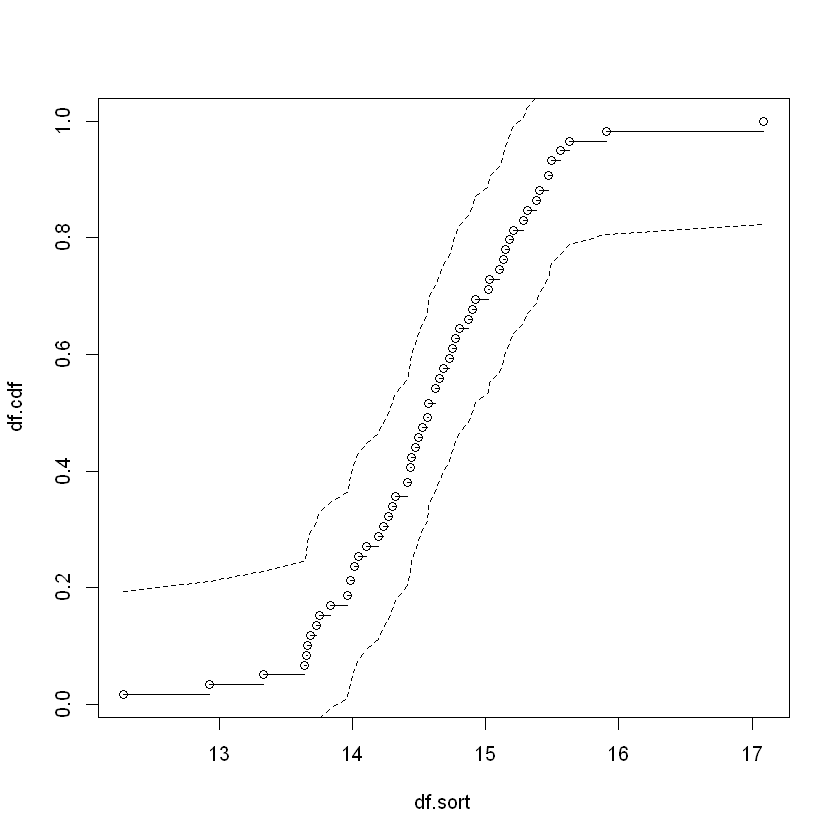

In [6]:
# 累计经验分布图
df.sort = sort(df)
df.rank = rank(df.sort) 
df.cdf = df.rank/length(df)
plot(df.sort,df.cdf)
N = length(df)
segments(df.sort[1:(N-1)],df.cdf[1:(N-1)] , df.sort[2:N],df.cdf[1:(N-1)])
alpha = 0.05
band = sqrt(1/(2*length(df))*log(2/alpha))
lower.95 = df.cdf-band
upper.95 = df.cdf+band
lines(df.sort,lower.95,lty=2)
lines(df.sort,upper.95,lty=2)

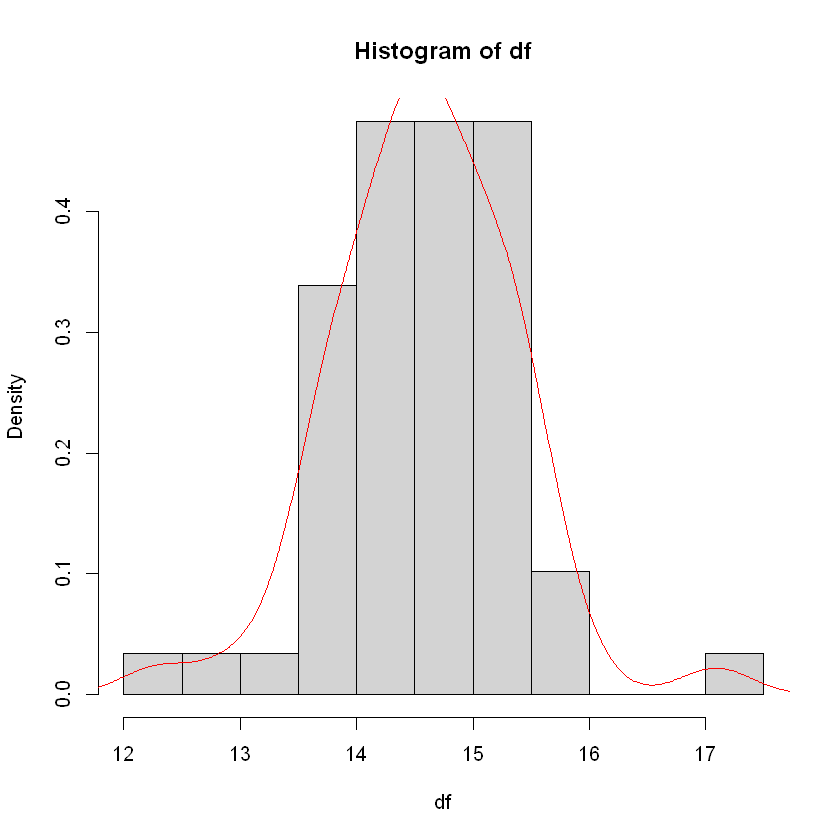

In [12]:
# 直方图
hist(df, freq = F) #概率密度直方图
lines(density(df), col='red') # 随机数的密度曲线

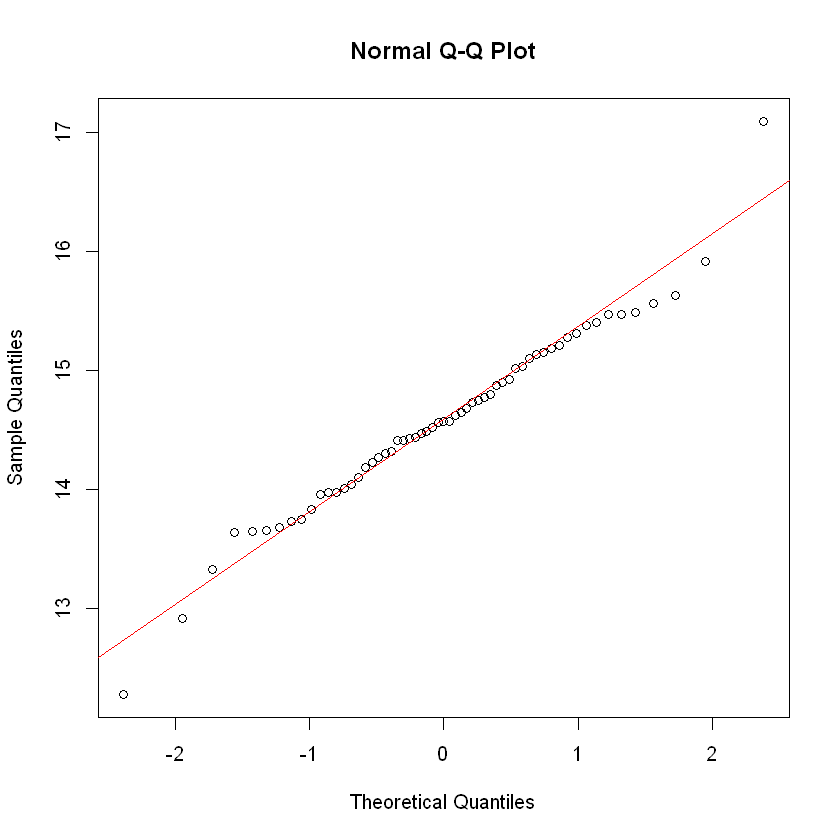

In [13]:
# QQ图
qqnorm(df)
qqline(df, col = "red")

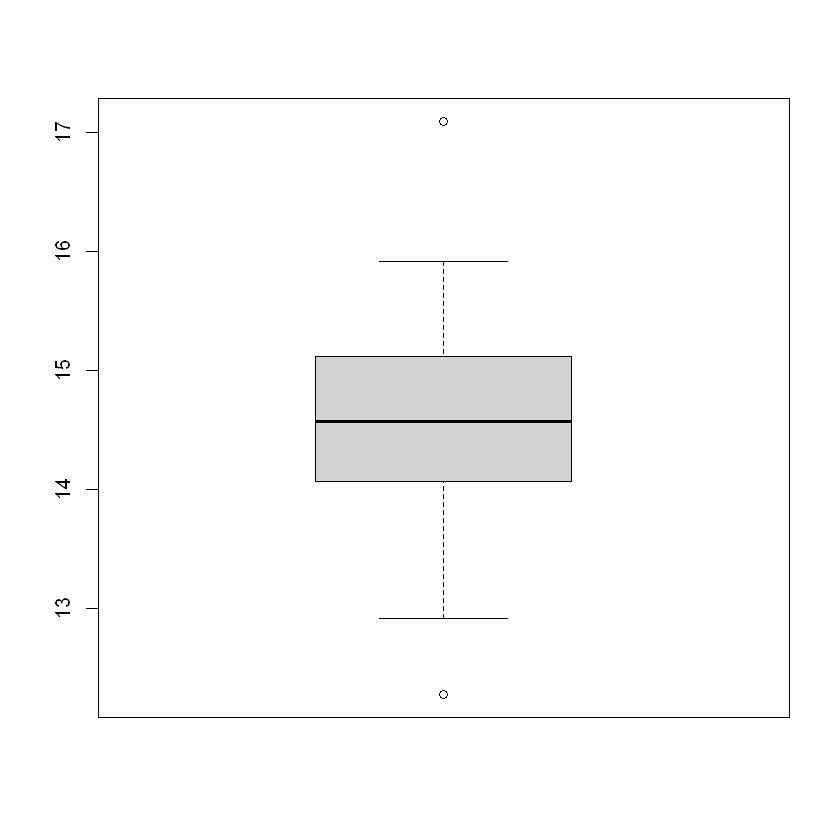

In [14]:
# 找到分位数
## 先画一个箱线图
boxplot(df)

In [24]:
# 求指定位置的分位数
data.frame(quantile(df,c(0.9,0.75,0.5,0.25,0.1)))

,quantile.df..c.0.9..0.75..0.5..0.25..0.1..
,<dbl>
90%,15.470
75%,15.115
50%,14.570
25%,14.070
10%,13.676


Loading required package: MASS


Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select


Loading required package: survival



summary statistics
------
min:  12.28   max:  17.09 
median:  14.57 
mean:  14.58 
estimated sd:  0.7764197 
estimated skewness:  0.02759178 
estimated kurtosis:  4.673903 

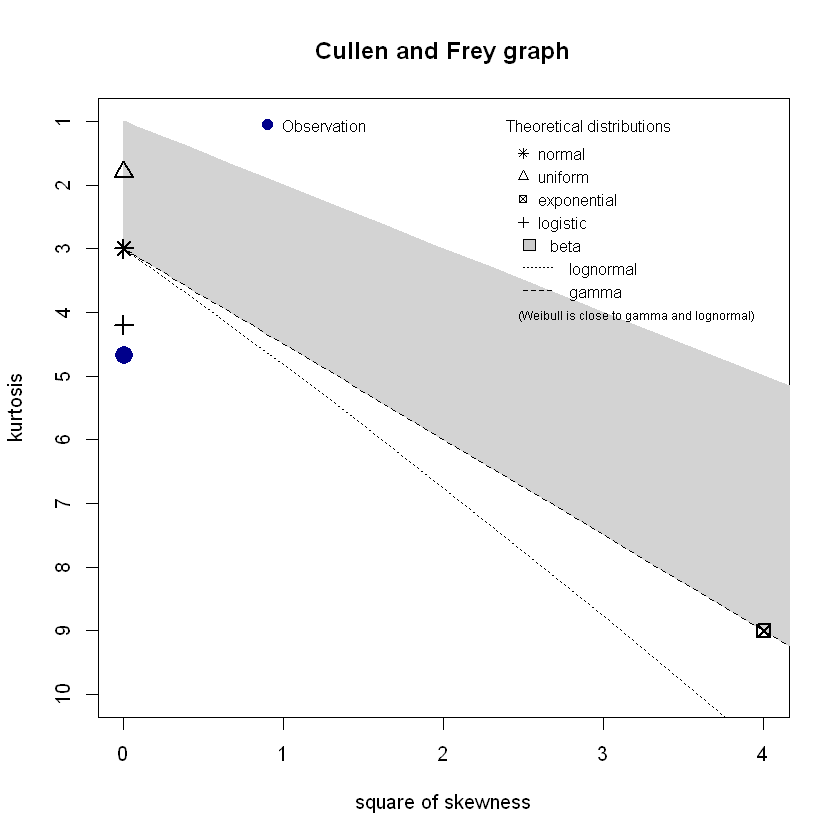

In [25]:
# 验证是否为正态分布
library(fitdistrplus)
descdist(df)

首先我们从峰度和偏度的角度进行分析：

峰度（kurtosis）表示分布的尖锐程度。正态分布的峰度为3，>3说明峰比正态分布的尖，<3说明峰比正态分布的平坦。

偏度（skewness）表示分布的偏离对称的程度。正态分布的偏度为0，偏度>0为右偏， 众数 < 中位数 < 算术平均值；偏度<0 为左偏，算术平均值 < 中位数 < 众数。

本题中的数据显然峰度较高，相较于正态分布，这个数据更接近逻辑分布。

In [26]:
# 最后从统计上进行检验
ks.test(df,'pnorm')

Warning message in ks.test(df, "pnorm"):
"ties should not be present for the Kolmogorov-Smirnov test"



	One-sample Kolmogorov-Smirnov test

data:  df
D = 1, p-value < 2.2e-16
alternative hypothesis: two-sided


Kolmogorov-smirnov检验可以验证单一样本是否来自某一特定分布。比如检验一组数据是否为正态分布α。它的检验方法是以样本数据的累积频数分布与特定理论分布比较,若两者间的差距很小,则推论该样本取自某特定分布族。

根据结果p- value << 0.05,拒绝原假设,即认为数据不满足正态分布。

### 1.12

In [16]:
# 导入数据
library(readxl)
drugdata<-read_excel("D://nonparametric//各章数据//第1章//drug.xlsx")#导入数据
drugdata

group,time,perpon
<dbl>,<dbl>,<chr>
0,174,BG
1,263,BG
2,105,BG
3,141,BG
4,199,BG
5,108,BG
6,141,BG
0,224,JF
1,213,JF


In [17]:
data2<-as.matrix(drugdata)#转化为矩阵
Data2<-apply(data2,2,as.list) #转化为列表
DrugDatagroup<-as.numeric(Data2$group)  #转换为数值型
DrugDatagroup
DrugDatatime<-as.numeric(Data2$time)  #转换为数值型
DrugDatatime
DRUG<-c(DrugDatatime,DrugDatagroup)#将time和group列转化为向量

[1] 0 1 2 3 4 5 6 0 1 2 3 4 5 6 0 1 2 3 4 5 6 0 1 2 3 4 5 6 0 1 2 3 4 5 6 0 1 2
[39] 3 4 5 6 0 1 2 3 4 5 6 0 1 2 3 4 5 6 0 1 2 3 4 5 6 0 1 2 3 4 5 6

[1] 174 263 105 141 199 108 141 224 213 103 168 143 341 184 260 231 145  78 113
[20] 159 125 255 291 103 164 225 135 227 165 168 144 127 176 239 194 237 121  94
[39] 114 144 136 155 191 137  35  96  87 140 121 100 102 133 222 120 134 129 115
[58]  89  83 165 100 185  79 189 433 237 168 173 188 317

In [18]:
DRUG1<-data.frame(matrix(lapply(DRUG,as.character),nrow=2))#转换为dataframe

library("survival") 
fit <- survfit(Surv(DrugDatatime) ~ DrugDatagroup, data = DRUG1)  #拟合生存曲线
summary(fit)

Call: survfit(formula = Surv(DrugDatatime) ~ DrugDatagroup, data = DRUG1)

                DrugDatagroup=0 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
  100     10       1      0.9  0.0949       0.7320        1.000
  115      9       1      0.8  0.1265       0.5868        1.000
  165      8       1      0.7  0.1449       0.4665        1.000
  174      7       1      0.6  0.1549       0.3617        0.995
  189      6       1      0.5  0.1581       0.2690        0.929
  191      5       1      0.4  0.1549       0.1872        0.855
  224      4       1      0.3  0.1449       0.1164        0.773
  237      3       1      0.2  0.1265       0.0579        0.691
  255      2       1      0.1  0.0949       0.0156        0.642
  260      1       1      0.0     NaN           NA           NA

                DrugDatagroup=1 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
   89     10       1      0.9  0.0949       0.7320        1.000
  102      9       1      

Loading required package: ggplot2

Loading required package: ggpubr


Attaching package: 'survminer'


The following object is masked from 'package:survival':

    myeloma




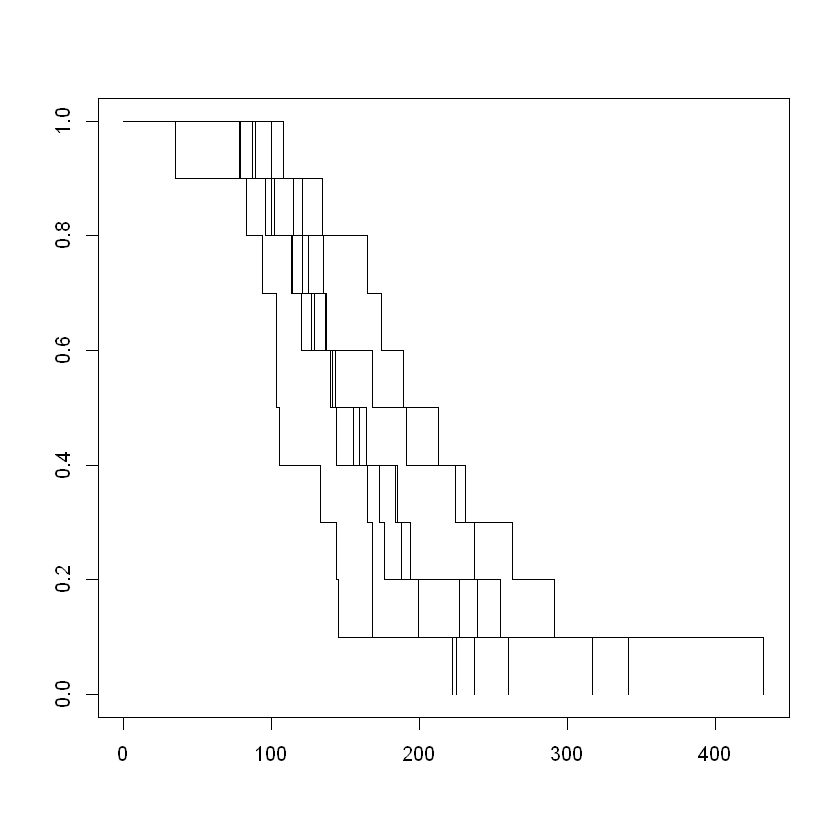

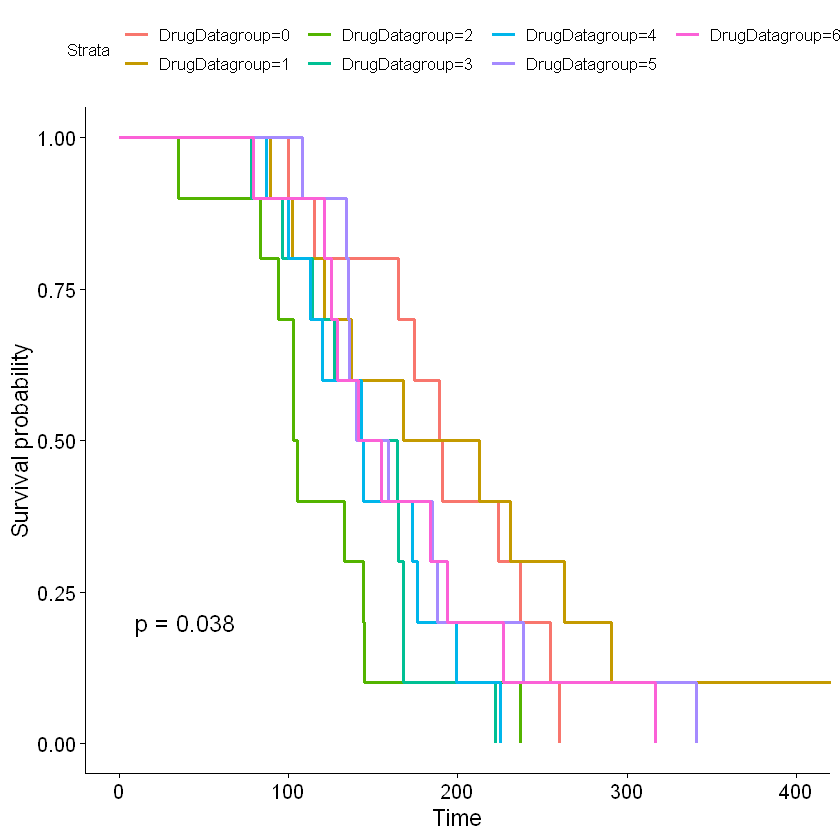

In [21]:
#结果的形象化展示
plot(fit)
library(survminer) #用survminer进行漂亮的展示
ggsurvplot(fit, main = "Survival curve", data = DRUG1,
           pval=TRUE  #添加P值
)

p值小于0.05，拒绝原假设，说明不同药剂减少瘙痒时间的效果有显著差异

## 练习

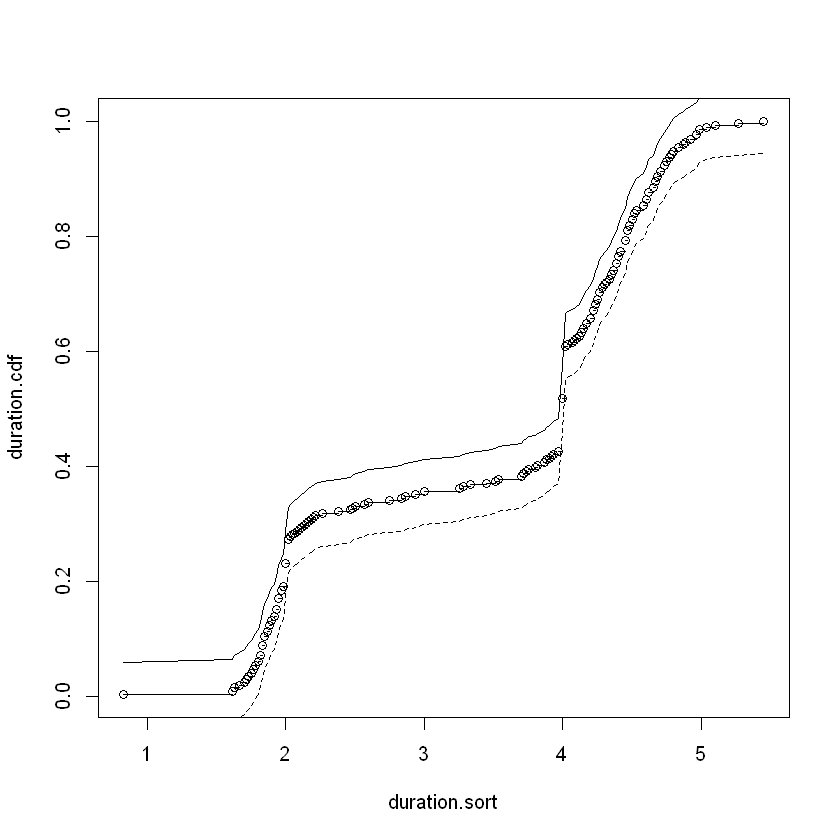

In [6]:
### 实验一：经验分布的置信区间

library(MASS)
data(geyser)
duration = geyser[,2]
duration.sort = sort(duration)
duration.rank = rank(duration.sort)
duration.cdf = duration.rank/length(duration)
plot(duration.sort,duration.cdf)

N = length(duration)
segments(duration.sort[1:(N-1)],duration.cdf[1:(N-1)],duration.sort[2:N],duration.cdf[1:(N-1)])
alpha = 0.5
band = sqrt(1/(2*N))*log(2/alpha)
lower.95 = duration.cdf - band
upper.95 = duration.cdf + band
lines(duration.sort,lower.95,lty = 2)
lines(duration.sort,upper.95)

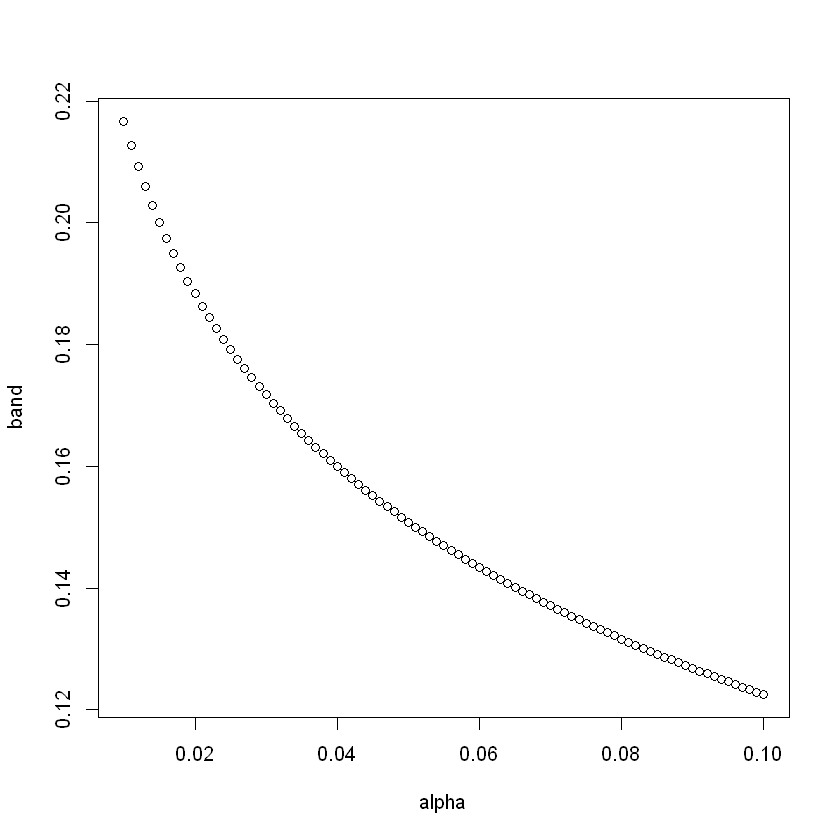

In [7]:
alpha = seq(0.01,0.1,by = 0.001)
band = sqrt(1/(2*N))*log(2/alpha)
plot(alpha,band)

可见，置信区间宽度随a值的增大而变小

In [9]:
### U统计量 
# (1)从t分布中产生样本量为20的样本
# (2)计算用于检验样本对称性的U统计量
# (3)观察U统计量的分布
# (4)判断分布的对称性
# ctrl+/ 全部加注释；再按一次就是取消注释

Ufund = function(df,n)
{
    USTAT = NULL
    for(mu in 1:n)
    {
        x = rt(20,df)
        n1 = length(x)
        H = NULL
        for(i in 1:(n1-2))
        for(j in (i+1):(n1-1))
        for(k in (j+1):n1)
        { 
            a1 = sign(2*x[i]-x[j]-x[k]) # sign(x)为示性函数
            a2 = sign(2*x[j]-x[i]-x[k])
            a3 = sign(2*x[k]-x[i]-x[j])
            h = 1/3*(a1+a2+a3)
            H = c(H,h)
        }
        Ustat = (1/choose(length(x),3))*sum(H)  # 计算对称核
        USTAT = c(USTAT,Ustat)
    }
    hist(USTAT,border=F,col = 'gray1')
    list(Umean = mean(USTAT),Uvar = var(USTAT))
}

$Umean
[1] -0.0001247563

$Uvar
[1] 0.002506947

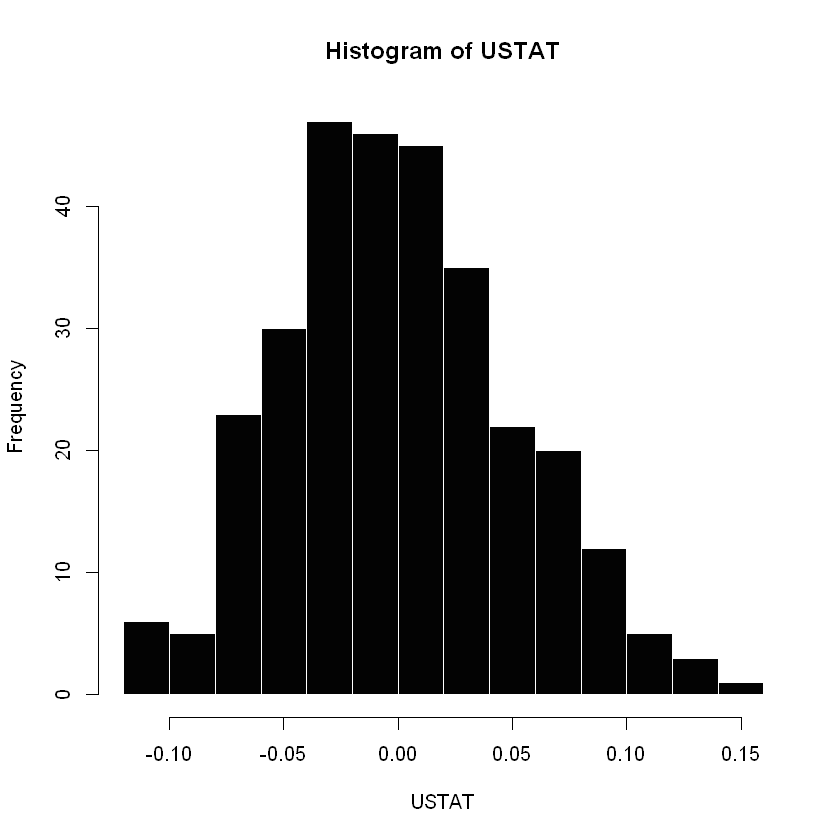

In [11]:
Ufund(3,300)

（1）从直方图来看，U统计量近似以0为中心呈对称分布

（2）Umean近似为0，即θ(p)接近0

（3）t分布是对称的